# Post-fit by NPs

**Motivation:** Max said it was super-hyper-cool to understand the post-fit behavior w/r.t. each of the individual NPs.

**Can I load this in + compare the shapes, stat error, and ttl unc for some different workspaces that I have?**

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoLocator, AutoMinorLocator, MultipleLocator,FixedLocator, LogLocator

import os
os.sys.path += ['../deta_cats/','../non-resonant-studies','../code/']
from statUtils import plotCorrelation
from pull_imp_utils import *
from eventDisplays import rainbow_text

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

Using uproot4


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [ ]:
ws = pyhf.Workspace(json.load(open(ws_file)))

    mu = 0  
    
    if bkgd_only:
        model, data, bestfit, errors, obj = fitresults(ws,fix_poi=0, return_result_obj=True)
    else:
        model, data, bestfit, errors, obj = fitresults(ws,mu_bounds=[-1000,10000], return_result_obj=True)
    
    try:
        # pyhf 5.X syntax
        corr_mat = np.asarray(obj.minuit.matrix(correlation=True, skip_fixed=False))
    except:
        # pyhf 6.X syntax
        corr_mat = np.asarray(obj.corr)

    postfit = model.expected_actualdata(bestfit) 
    
    try:
        bf_mueq0 = bestfit.copy()
    except:
        bf_mueq0 = bestfit.clone()
    bf_mueq0[model.config.poi_index] = 0
    
    postfit_back = model.expected_actualdata(bf_mueq0) 
    
    postfit_err = calculate_stdev(model, bestfit, errors, corr_mat) 


### Step 1: $H_T$ split

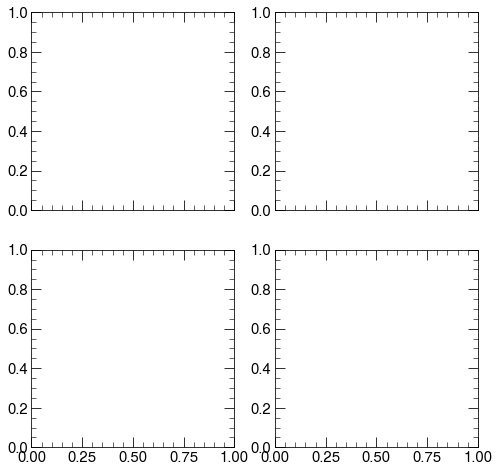

In [2]:
fig, ax = plt.subplots(2,2, figsize=(8,8),  sharex=True)

# gridspec_kw={"height_ratios": [.75, .25], "hspace":0.07, "left":0.098, "bottom":0.09}

ax[0,0].plt


### Step 2: quads split